In [1]:
#Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

#Study data files 
file_path = "~/Desktop/gt-atl-data-pt-03-2021-u-c/05-Matplotlib/Homework/Instructions/Pymaceuticals/"
mouse_metadata_path = file_path + "data/Mouse_metadata.csv"
study_results_path = file_path + "data/Study_results.csv"

#Read the Mouse and Drug Data and the Clinical Trial Data
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

#Combine the data into a single dataset
mouse_data_full = pd.merge(study_results, mouse_metadata, how="left", on=["Mouse ID", "Mouse ID"])

#Display the data table for preview
mouse_data_full.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [2]:
#Checking the number of mice
num_mice = len(mouse_data_full)
num_mice


1893

In [3]:
#Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
duplicate_mice = []
mouse_id_group = mouse_data_full.sort_values(["Mouse ID", "Timepoint"])
mouse_id_group.head(40)

dupe_mice = mouse_id_group[mouse_id_group.duplicated(subset=None, keep=False)]
dupe_mice.head()



,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.0,0,Propriva,Female,21,26
137,g989,0,45.0,0,Propriva,Female,21,26


In [4]:
#Create a clean DataFrame by dropping the duplicate mouse by its ID.
for mouse in dupe_mice["Mouse ID"]:
    indexNames = mouse_data_full[mouse_data_full["Mouse ID"] == mouse].index
    mouse_data_full.drop(indexNames, inplace=True)

In [5]:
#Checking the number of mice in the clean DataFrame.
print(len(mouse_data_full))

1880


In [6]:
drug_df = mouse_data_full.groupby("Drug Regimen")
drug_names_df = drug_df.first()
#print(drug_names_df)

drug_df_Capomulin = drug_df.get_group("Capomulin")["Tumor Volume (mm3)"]
capomulin_stats = ["Capomulin", drug_df_Capomulin.mean(), drug_df_Capomulin.median(), drug_df_Capomulin.var(), drug_df_Capomulin.std(), drug_df_Capomulin.sem()]

drug_df_Ceftamin = drug_df.get_group("Ceftamin")["Tumor Volume (mm3)"]
ceftamin_stats = ["Ceftamin", drug_df_Ceftamin.mean(), drug_df_Ceftamin.median(), drug_df_Ceftamin.var(), drug_df_Ceftamin.std(), drug_df_Ceftamin.sem()]

drug_df_Infubinol = drug_df.get_group("Infubinol")["Tumor Volume (mm3)"]
infubinol_stats = ["Infubinol", drug_df_Infubinol.mean(), drug_df_Infubinol.median(), drug_df_Infubinol.var(), drug_df_Infubinol.std(), drug_df_Infubinol.sem()]

drug_df_Ketapril = drug_df.get_group("Ketapril")["Tumor Volume (mm3)"]
ketapril_stats = ["Ketapril", drug_df_Ketapril.mean(), drug_df_Ketapril.median(), drug_df_Ketapril.var(), drug_df_Ketapril.std(), drug_df_Ketapril.sem()]

drug_df_Naftisol = drug_df.get_group("Naftisol")["Tumor Volume (mm3)"]
naftisol_stats = ["Naftisol", drug_df_Naftisol.mean(), drug_df_Naftisol.median(), drug_df_Naftisol.var(), drug_df_Naftisol.std(), drug_df_Naftisol.sem()]

drug_df_Placebo = drug_df.get_group("Placebo")["Tumor Volume (mm3)"]
placebo_stats = ["Placebo", drug_df_Placebo.mean(), drug_df_Placebo.median(), drug_df_Placebo.var(), drug_df_Placebo.std(), drug_df_Placebo.sem()]

drug_df_Propriva = drug_df.get_group("Propriva")["Tumor Volume (mm3)"]
propriva_stats = ["Propriva", drug_df_Propriva.mean(), drug_df_Propriva.median(), drug_df_Propriva.var(), drug_df_Propriva.std(), drug_df_Propriva.sem()]

drug_df_Ramicane = drug_df.get_group("Ramicane")["Tumor Volume (mm3)"]
ramicane_stats = ["Ramicane", drug_df_Ramicane.mean(), drug_df_Ramicane.median(), drug_df_Ramicane.var(), drug_df_Ramicane.std(), drug_df_Ramicane.sem()]

drug_df_Stelasyn = drug_df.get_group("Stelasyn")["Tumor Volume (mm3)"]
stelasyn_stats = ["Stelasyn", drug_df_Stelasyn.mean(), drug_df_Stelasyn.median(), drug_df_Stelasyn.var(), drug_df_Stelasyn.std(), drug_df_Stelasyn.sem()]

drug_df_Zoniferol = drug_df.get_group("Zoniferol")["Tumor Volume (mm3)"]
zoniferol_stats = ["Zoniferol", drug_df_Zoniferol.mean(), drug_df_Zoniferol.median(), drug_df_Zoniferol.var(), drug_df_Zoniferol.std(), drug_df_Zoniferol.sem()]


stats_summary = pd.DataFrame([capomulin_stats, ceftamin_stats, infubinol_stats, ketapril_stats, naftisol_stats, placebo_stats, propriva_stats, ramicane_stats, stelasyn_stats, zoniferol_stats],
                            columns = ["Drug Regimen", "Mean", "Median", "Variance", "Standard Dev", "SEM"])
stats_summary

,Drug Regimen,Mean,Median,Variance,Standard Dev,SEM
0,Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
1,Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
2,Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
3,Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
4,Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
5,Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
6,Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
7,Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
8,Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111
9,Zoniferol,53.236507,51.818479,48.533355,6.966589,0.516398


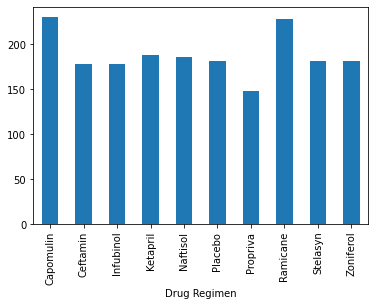

In [7]:
drug_count = drug_df["Mouse ID"].count()
drug_count.plot.bar()

<BarContainer object of 10 artists>

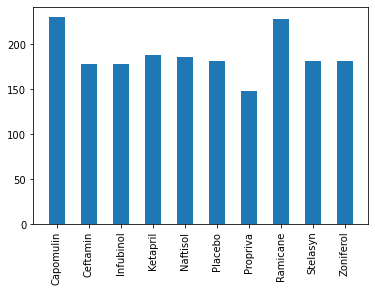

In [8]:
drug_names = drug_count.keys()

plt.xticks(rotation = "vertical")
plt.bar(drug_names, drug_count, width = .5)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001FEB8062D68>],
      dtype=object)

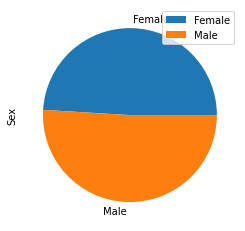

In [9]:
sex_count = mouse_data_full.groupby("Sex").agg({"Sex":"count"})
sex_count

sex_count.plot.pie(subplots=True)

C:\Users\JohnJohn\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:2: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  


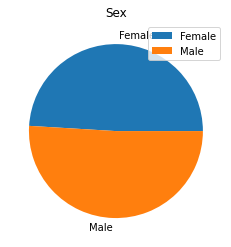

In [10]:
labels = sex_count.index
plt.pie(sex_count, labels = labels)
plt.title("Sex")
plt.legend(labels, loc="best")

In [11]:
# find tumor volume at final timepoint for all drug regimens
drug_names_final = drug_df.last()
drug_names_final

# keep final tumor volumes for requested drug regimens, drop all other data
top_4_final = drug_names_final.drop(index=['Ketapril', 'Naftisol', 'Placebo', 'Propriva', 'Stelasyn', 'Zoniferol'], columns=['Mouse ID', 'Metastatic Sites', 'Sex', 'Age_months', 'Weight (g)'])
top_4_final

,Timepoint,Tumor Volume (mm3)
Drug Regimen,,
Capomulin,45,31.023923
Ceftamin,45,61.433892
Infubinol,45,60.918767
Ramicane,45,33.562402


In [15]:
# calculate quartiles and IQR of each of the 4 requested drug regimens

Capomulin_quartiles = drug_df_Capomulin.quantile([0.25,0.5,0.75])
Cap_lowerq = Capomulin_quartiles[0.25]
Cap_upperq = Capomulin_quartiles[0.75]
Capomulin_iqr = Cap_upperq - Cap_lowerq
Cap_lowerb = (Cap_lowerq - (1.5 * Capomulin_iqr))
Cap_upperb = (Cap_upperq + (1.5 * Capomulin_iqr))
Cap_summary = ["Capomulin", Cap_lowerq, Cap_upperq, Capomulin_iqr, Cap_lowerb, Cap_upperb]

Ceftamin_quartiles = drug_df_Ceftamin.quantile([0.25,0.5,0.75])
Cef_lowerq = Ceftamin_quartiles[0.25]
Cef_upperq = Ceftamin_quartiles[0.75]
Ceftamin_iqr = Cef_upperq - Cef_lowerq
Cef_lowerb = (Cef_lowerq - (1.5 * Ceftamin_iqr))
Cef_upperb = (Cef_upperq + (1.5 * Ceftamin_iqr))
Cef_summary = ["Ceftamin", Cef_lowerq, Cef_upperq, Ceftamin_iqr, Cef_lowerb, Cef_upperb]

Infubinol_quartiles = drug_df_Infubinol.quantile([0.25,0.5,0.75])
Inf_lowerq = Infubinol_quartiles[0.25]
Inf_upperq = Infubinol_quartiles[0.75]
Infubinol_iqr = Inf_upperq - Inf_lowerq
Inf_lowerb = (Inf_lowerq - (1.5 * Infubinol_iqr))
Inf_upperb = (Inf_upperq + (1.5 * Infubinol_iqr))
Inf_summary = ["Infubinol", Inf_lowerq, Inf_upperq, Infubinol_iqr, Inf_lowerb, Inf_upperb]

Ramicane_quartiles = drug_df_Ramicane.quantile([0.25,0.5,0.75])
Ram_lowerb = Ramicane_quartiles[0.25]
Ram_upperb = Ramicane_quartiles[0.75]
Ramicane_iqr = Ram_upperq - Ram_lowerq
Ram_lowerb = (Ram_lowerq - (1.5 * Ramicane_iqr))
Ram_upperb = (Ram_upperq + (1.5 * Ramicane_iqr))
Ram_summary = ["Ramicane", Ram_lowerq, Ram_upperq, Ramicane_iqr, Ram_lowerb, Ram_upperb]

top_4_quartile_summary = pd.DataFrame([Cap_summary, Cef_summary, Inf_summary, Ram_summary],
                            columns = ["Drug Regimen", "Lower Quartile", "Upper Quartile", "IQR", "Lower Bound", "Upper Bound"])
top_4_quartile_summary

,Drug Regimen,Lower Quartile,Upper Quartile,IQR,Lower Bound,Upper Bound
0,Capomulin,37.685933,45.000000,7.314067,26.714832,55.971101
1,Ceftamin,47.208427,56.801438,9.593010,32.818911,71.190953
2,Infubinol,47.312353,57.314444,10.002091,32.309217,72.317580
3,Ramicane,36.674635,45.000000,8.325365,24.186586,57.488048


In [44]:
# now find tumor volume at initial timepoint for all drug regimens
drug_names_initial = drug_df.first()
drug_names_initial

# and keep initial tumor volumes for requested drug regimens, drop all other data
top_4_initial = drug_names_initial.drop(index=['Ketapril', 'Naftisol', 'Placebo', 'Propriva', 'Stelasyn', 'Zoniferol'], columns=['Mouse ID', 'Metastatic Sites', 'Sex', 'Age_months', 'Weight (g)'])
# show to reference with lower bounds
top_4_initial

,Timepoint,Tumor Volume (mm3)
Drug Regimen,,
Capomulin,0,45.0
Ceftamin,0,45.0
Infubinol,0,45.0
Ramicane,0,45.0


In [52]:
# quick for loops to check all possible tumor volumes against each drug's respective lower and upper bounds.
Cap_outliers = []
Cef_outliers = []
Inf_outliers = []
Ram_outliers = []

for volume in drug_df_Capomulin:
    if volume < Cap_lowerb or volume > Cap_upperb:
        Cap_outliers.append(volume)

for volume in drug_df_Ceftamin:
    if volume < Cef_lowerb or volume > Cef_upperb:
        Cef_outliers.append(volume)

for volume in drug_df_Infubinol:
    if volume < Inf_lowerb or volume > Inf_upperb:
        Inf_outliers.append(volume)

for volume in drug_df_Ramicane:
    if volume < Ram_lowerb or volume > Ram_upperb:
        Ram_outliers.append(volume)

print(Cap_outliers)
print(Cef_outliers)
print(Inf_outliers)
print(Ram_outliers)

[25.47214326, 23.34359787]
[]
[]
[22.05012627]


## By checking all Tumor Volumes for each of the four drugs against their respective Upper and Lower Bounds, we can see there are potential outliers for Capomulin and Ramicane.

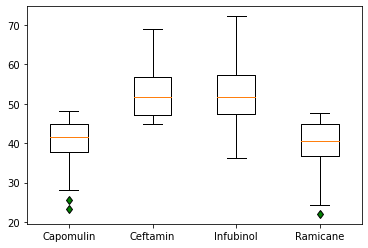

In [53]:
green_diamond = dict(markerfacecolor='g', marker='d')
fig1, ax1 = plt.subplots()
top_4_data = [drug_df_Capomulin, drug_df_Ceftamin, drug_df_Infubinol, drug_df_Ramicane]
ax1.set_xticklabels(["Capomulin", "Ceftamin", "Infubinol", "Ramicane"])
ax1.boxplot(top_4_data, flierprops = green_diamond)

plt.show()

## Our Boxplots visually confirm our findings with regard to outliers.

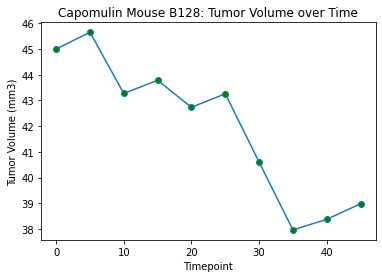

In [83]:
mouse_id_df = mouse_data_full.groupby("Mouse ID")
Cap_mouse_df = mouse_id_df.get_group("b128")
Cap_mouse_df 

Cap_mouse_x = Cap_mouse_df["Timepoint"]
Cap_mouse_y = Cap_mouse_df["Tumor Volume (mm3)"]

plt.title("Capomulin Mouse B128: Tumor Volume over Time")
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume (mm3)")
plt.plot(Cap_mouse_x, Cap_mouse_y, marker = 'o', markerfacecolor = 'g')

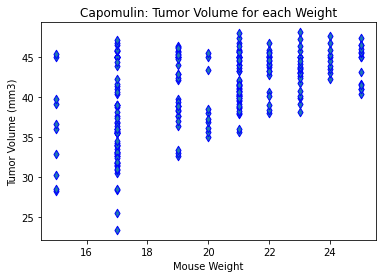

In [87]:
Capomulin_df = drug_df.get_group("Capomulin")
Capomulin_df

Cap_scatter_x = Capomulin_df["Weight (g)"]
Cap_scatter_y = Capomulin_df["Tumor Volume (mm3)"]

plt.title("Capomulin: Tumor Volume for each Weight")
plt.xlabel("Mouse Weight")
plt.ylabel("Tumor Volume (mm3)")
plt.scatter(Cap_scatter_x, Cap_scatter_y, marker = 'd', edgecolors = 'b')